In [29]:
import pandas as pd

iris = pd.read_csv('data\iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


<Axes: >

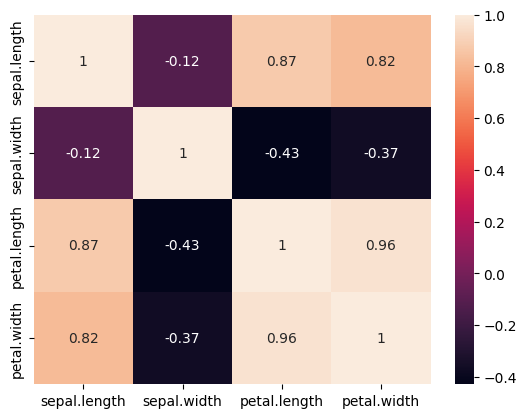

In [30]:
# импортируем seaborn для построения графиков
import seaborn as sns

# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(iris.corr(numeric_only=True), annot=True)

In [31]:
iris = iris.drop(['petal.width'], axis=1)

In [32]:
iris = iris.drop(['petal.length'], axis=1)

In [33]:
df = pd.read_csv('data\wine_cleared.csv')

# для удобства сразу преобразуем признак в int
df['price_round'] = df['price'].round().astype(int)

regex = '\d{4}' # регулярное выражение для нахождения чисел
df['year'] = df['title'].str.findall(regex).str.get(0)

df['is_usa'] = df['country'].apply(lambda x: 1 if x == 'US' else 0)
df['is_france'] = df['country'].apply(lambda x: 1 if x == 'France' else 0)
df['is_italy'] = df['country'].apply(lambda x: 1 if x == 'Italy' else 0)

df['old_wine'] = df['year'].apply(lambda x: 1 if (not pd.isnull(x) and int(x) < 2010) else 0)

regex2 = '\((.*?)\)' # регулярное выражение для нахождения в скобках
df['locality'] = df['title'].str.findall(regex2).str.get(0)

cor = df['price'].corr(df['points'])

<Axes: >

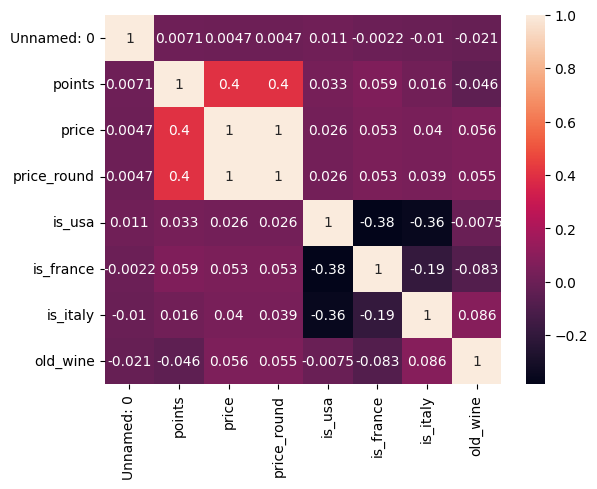

In [34]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: >

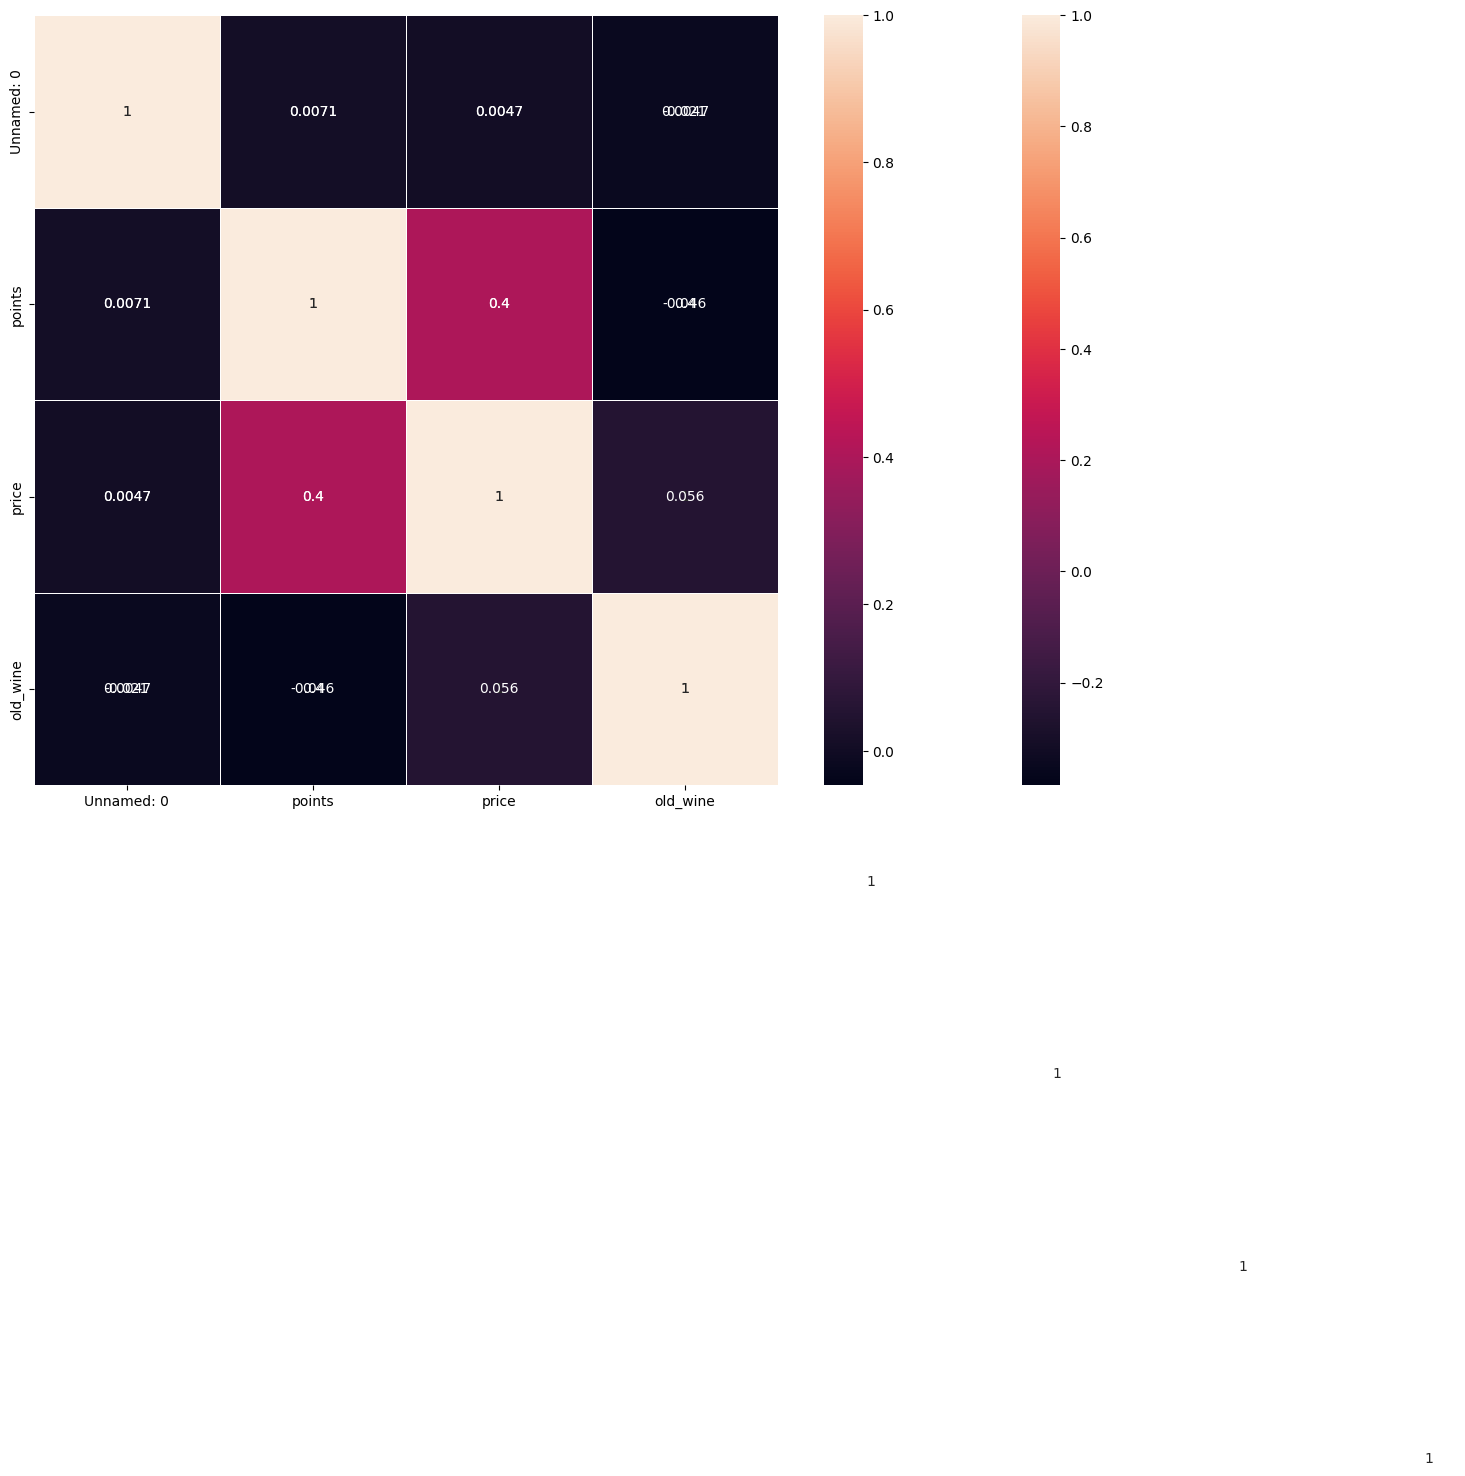

In [35]:
# Построим график корреляции всех величин. Для простоты воспользуемся корреляцией Пирсона.

# работа с визуализацией
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=.5, ax=ax)

# Удалим самые сильно скоррелированные пары
df = df.drop(['is_usa', 'is_france', 'is_italy', 'price_round'], axis=1)

# Проверяем, что сильно скоррелированных признаков не осталось
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=.5, ax=ax)